In [119]:
api_key = 'RGAPI-81fa66af-c6ae-4f82-baec-4865252dec09'

In [120]:
# use riotwatcher (https://github.com/pseudonym117/Riot-Watcher)

from riotwatcher import RiotWatcher
import numpy as np
import time
import json

watcher = RiotWatcher(api_key)

my_region = 'na1'

In [75]:
from progressbar import AnimatedMarker, Bar, BouncingBar, Counter, ETA, \
    AdaptiveETA, FileTransferSpeed, FormatLabel, Percentage, \
    ProgressBar, ReverseBar, RotatingMarker, \
    SimpleProgress, Timer, UnknownLength
    
def show_progress_bar(display_string, total_duration, num_increments):
    widgets = [display_string, Percentage(), ' ', Bar(),
               ' ', ETA()]
    pbar = ProgressBar(widgets=widgets, maxval=num_increments).start()
    time_increment = total_duration / num_increments
    s = time.time()
    for i in range(num_increments):
        time.sleep(time_increment)
        pbar.update(i+1)
    pbar.finish()
    e = time.time()
    print(e-s, 'seconds elapsed')

In [99]:
account_id_list = [233246710, 233033899, 203021036, 203021036, 32236961, 35196312, 233871907, 41897392, 44777402, 33773329, 200950816]

In [100]:
max_time = 120

for account_id in account_id_list:
    s = time.time()
    print('Current account:', str(account_id))
    try:
        matches = watcher.match.matchlist_by_account(my_region, account_id = account_id)
    except:
        print('error')
        continue
    for i, cur_match in enumerate(matches['matches'][:-1]):
        cur_match_id = cur_match['gameId']
        try:
            match = watcher.match.by_id(my_region, match_id = cur_match_id)
            fout = './dat/match_' + str(cur_match_id) + '.json'
            #print(i, cur_match_id, fout)
            with open(fout, 'w') as fp:
                json.dump(match, fp)
        except Exception as ex:
            print(ex)
            print(i, cur_match_id, 'issue')
            continue
    e = time.time()
    t = max_time - (e-s)
    display_string = 'Finished ' + str(account_id) + '. Waiting for API timer to reset: '
    show_progress_bar(display_string, total_duration=t, num_increments=100)

Current account: 233246710


Finished 233246710. Waiting for API timer to reset: 100% |######| Time: 0:01:33


93.68418717384338 seconds elapsed
Current account: 233033899


Finished 233033899. Waiting for API timer to reset: 100% |######| Time: 0:01:33


93.23031187057495 seconds elapsed
Current account: 203021036


Finished 203021036. Waiting for API timer to reset: 100% |######| Time: 0:01:19


79.2504870891571 seconds elapsed
Current account: 203021036


Finished 203021036. Waiting for API timer to reset: 100% |######| Time: 0:01:28


88.65419507026672 seconds elapsed
Current account: 32236961


KeyboardInterrupt: 

In [ ]:
#matches = watcher.match.matchlist_by_account(my_region, account_id = summoner_id['accountId'])

In [74]:
show_progress_bar(total_duration=5, num_increments=100)

5.448493003845215 seconds elapsed


In [115]:
for i, cur_match in enumerate(matches['matches'][:-1]):
    print(cur_match['season'])

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


In [124]:
match = watcher.match.timeline_by_match(my_region, match_id = 2831763541)

In [127]:
match.keys()

dict_keys(['frames', 'frameInterval'])

In [129]:
match['frameInterval']

60000

In [133]:
match['frames'][0].keys()

dict_keys(['participantFrames', 'events', 'timestamp'])

In [144]:
match['frames'][2]['timestamp']/60/1000
# note that each frame is one minute

2.00015

In [155]:
match['frames'][2]['participantFrames']['1'].keys()

dict_keys(['participantId', 'position', 'currentGold', 'totalGold', 'level', 'xp', 'minionsKilled', 'jungleMinionsKilled', 'dominionScore', 'teamScore'])

In [210]:
match['frames'][-1]['participantFrames']['1']

{'participantId': 1,
 'currentGold': 718,
 'totalGold': 15993,
 'level': 16,
 'xp': 16293,
 'minionsKilled': 232,
 'jungleMinionsKilled': 12}

In [156]:
match['frames'][2]['participantFrames']['1']['currentGold']

97

In [157]:
match['frames'][2]['participantFrames']['1']['totalGold']

597

In [158]:
match['frames'][2]['participantFrames']['1']['xp']

134

In [170]:
current_gold = []
total_gold = []
xp = []
frame = 2
frames = len(match['frames'])
for frame in range(frames):
    frame_current_gold = []
    frame_total_gold = []
    frame_xp = []
    for i in range(1,11):
        frame_current_gold.append(match['frames'][frame]['participantFrames'][str(i)]['currentGold'])
        frame_total_gold.append(match['frames'][frame]['participantFrames'][str(i)]['totalGold'])
        frame_xp.append(match['frames'][frame]['participantFrames'][str(i)]['xp'])
    current_gold.append(frame_current_gold)
    total_gold.append(frame_total_gold)
    xp.append(frame_xp)

In [172]:
current_gold = np.array(current_gold)

In [194]:
def calculate_team_total_and_difference(dat):
    team_total = np.array([np.sum(dat[:,:5],axis=1),np.sum(dat[:,5:],axis=1)]).transpose()
    team_total_diff = np.concatenate((team_total,(team_total[:,0] - team_total[:,1]).reshape((frames,1))),axis=1)
    return team_total_diff

In [197]:
team_current_gold = calculate_team_total_and_difference(np.array(current_gold))
team_total_gold = calculate_team_total_and_difference(np.array(total_gold))
team_xp = calculate_team_total_and_difference(np.array(xp))

In [201]:
1 - team_current_gold / team_total_gold

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[ 0.        ,  0.        ,         nan],
       [ 0.82781457,  1.        ,  0.        ],
       [ 0.85843373,  0.91675834,  0.59021922],
       [ 0.56920312,  0.71611253,  0.04557885],
       [ 0.79887504,  0.71222656,  1.54919236],
       [ 0.76199041,  0.55009823,  3.05673759],
       [ 0.65186173,  0.71262844, -0.13610315],
       [ 0.72755147,  0.82099068, -0.05327869],
       [ 0.90124038,  0.68837898,  5.37132988],
       [ 0.81234079,  0.72059047,  2.03030303],
       [ 0.73111706,  0.80624792, -0.98934551],
       [ 0.87690662,  0.8848418 ,  0.7882111 ],
       [ 0.89511846,  0.8262284 ,  1.59453303],
       [ 0.84241684,  0.80157171,  1.74242424],
       [ 0.94710722,  0.81047045,  5.06919946],
       [ 0.9043447 ,  0.90558151,  0.85353535],
       [ 0.95214106,  0.86392691, 25.62626263],
       [ 0.92899388,  0.85541163, -1.1882805 ],
       [ 0.84948923,  0.89362792, -2.6940874 ],
       [ 0.93537485,  0.83176297, -2.08436725],
       [ 0.94129289,  0.94612471,  1.253

In [212]:
import matplotlib.pyplot as plt

%matplotlib inline

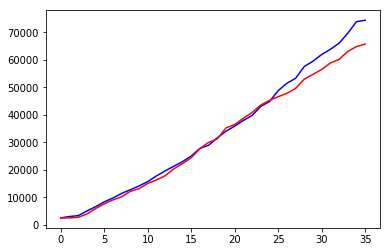

In [218]:
plt.plot(team_total_gold[:,0],color='blue')
plt.plot(team_total_gold[:,1],color='red')

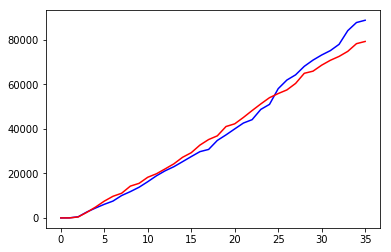

In [220]:
plt.plot(team_xp[:,0],color='blue')
plt.plot(team_xp[:,1],color='red')

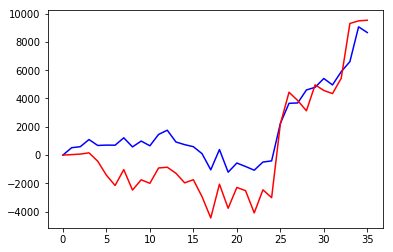

In [221]:
plt.plot(team_total_gold[:,2],color='blue')
plt.plot(team_xp[:,2],color='red')